# Supabase
This notebook shows a few examples of how supabase databases can be integrated with Python to help data analysis.

## Extracting data
This first example illustrates how to extract data from a supabase database.

In [2]:
from supabase import create_client
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# retrieve data from supabase database
supabase = create_client(SUPABASE_URL, SUPABASE_KEY)
response = supabase.table("cities").select("*").execute()
print(response)

data=[{'city_id': 'C1', 'city_name': 'London', 'city_country': 'England', 'city_population': 9000000}, {'city_id': 'C2', 'city_name': 'Athens', 'city_country': 'Greece', 'city_population': 3000000}, {'city_id': 'C3', 'city_name': 'Toronto', 'city_country': 'Canada', 'city_population': 3000000}] count=None


In [3]:
# convert to pandas dataframe
data = list(response)[0][1]
columnNames = data[0].keys()
dataDict = {}
for colName in columnNames:
    dataDict[colName] = [row[colName] for row in data]
cities = pd.DataFrame(dataDict)
cities

,city_id,city_name,city_country,city_population
0,C1,London,England,9000000
1,C2,Athens,Greece,3000000
2,C3,Toronto,Canada,3000000


In [4]:
# alternatively, we could have used this function
def get_all_data(tableName):
    response = supabase.table(tableName).select("*").execute()
    return list(response.data)
get_all_data("cities")

[{'city_id': 'C1',
  'city_name': 'London',
  'city_country': 'England',
  'city_population': 9000000},
 {'city_id': 'C2',
  'city_name': 'Athens',
  'city_country': 'Greece',
  'city_population': 3000000},
 {'city_id': 'C3',
  'city_name': 'Toronto',
  'city_country': 'Canada',
  'city_population': 3000000}]

In [5]:
# now we can analyse with pandas
cities.city_population.mean()

5000000.0

This is perhaps not the most useful statistic, since the mean of the city populations does not tell us much about the world. Instead, let's create a bar graph to show the different populations of each city.

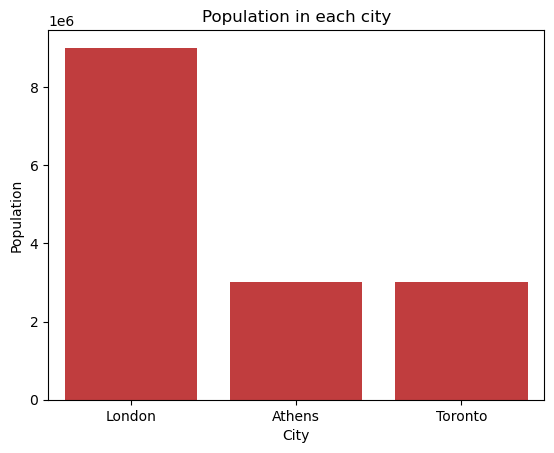

In [6]:
sns.barplot(data=cities, x="city_name", y="city_population", color=sns.color_palette()[3])
plt.xlabel("City")
plt.ylabel("Population")
plt.title("Population in each city")
plt.show()

In [7]:
# this illustrates another method of retrieving data from the database
def get_city_by_id(city_id: str):
    response = (
        # equivalent to SELECT * FROM cities WHERE id = city_id;
        supabase.table("cities").select("*").eq("city_id", city_id).execute()
    )
    # crash-proof return statement
    return response.data[0] if response.data else None

# for example we can retrieve the city with ID = C1
mysteryCity = get_city_by_id("C1")
print(mysteryCity)

{'city_id': 'C1', 'city_name': 'London', 'city_country': 'England', 'city_population': 9000000}


## Authentication
This is an example of how you can create a client account with supabase and then log in.

In [8]:
def sign_up(email, password):
    return supabase.auth.sign_up({"email":email, "password":password})

def sign_in(email, password):
    return supabase.auth.sign_in_with_password({"email":email, "password":password})

Note: it is not required to assign the `sign_in` function to a variable as displayed above.

## Supabase Storage

To illustrate Supabase's storage capabilities through buckets we are going to upload the Iris dataset to Supabase, then render it into this Jupyter notebook.

In [11]:
from sklearn import datasets
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.to_csv("Iris.csv")
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
